In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/multipleFeatures.csv')

In [3]:
df

,area,bedrooms,bathrooms,age,price
0,2100,3,2,5,320000
1,1800,2,1,10,250000
2,2400,4,3,8,450000
3,1900,3,2,6,300000
4,3000,4,3,2,500000
5,2200,3,2,4,350000


In [29]:
df.shape
i = df.iloc[0]
i.shape

(5,)

In [5]:
#x: Features: area, bedrooms, bathrooms, age
#y: Target : Price
x = []
y = []
for i in range(df.shape[0]):
    temp = df.iloc[i]
    x.append(temp[0:-1])
    y.append(temp[-1])
    

In [6]:
x_values = np.array(x)

x_values

array([[2100,    3,    2,    5],
       [1800,    2,    1,   10],
       [2400,    4,    3,    8],
       [1900,    3,    2,    6],
       [3000,    4,    3,    2],
       [2200,    3,    2,    4]])

In [7]:
y_values = np.array(y)

y_values

array([320000, 250000, 450000, 300000, 500000, 350000])

In [8]:
 def calculate_cost(x_values, y_values, w_values, b): 
    
    m = x_values.shape[0]
    cost = 0
    for i in range(m):                                
        f_wb_i = np.dot(x_values[i], w_values) + b           
        cost = cost + (f_wb_i - y_values[i])**2       
    return cost / (2 * m)      

In [9]:
def calculate_gradient_descent(x_values, y_values, w_values, b): 
    m,n = x_values.shape     
    #m : examples ; n: features 
    derivatives_w = np.zeros((n,))
    derivative_b = 0

    for i in range(m):                             
        error = (np.dot(x_values[i], w_values) + b) - y_values[i]   
        for j in range(n):                         
            derivatives_w[j] = derivatives_w[j] + error * x_values[i, j]    
        derivative_b = derivative_b + error                        
                               
        
    return derivative_b/m, derivatives_w/m

In [10]:
import copy

def gradient_descent(x_values, y_values, w_initial_values, b_initial, cost_function, gradient_function, alpha, iterations): 
    

    cost_cache = []
    w_values = copy.deepcopy(w_initial_values)  
    b = b_initial
    for i in range(iterations):

        derivative_b,derivatives_w = gradient_function(x_values, y_values, w_values, b)   

        w_values = w_values - alpha * derivatives_w              
        b = b - alpha * derivative_b
        
        if i<100000:
            cost_cache.append(cost_function(x_values, y_values, w_values, b))
            
    return w_values, b, cost_cache 

In [11]:
w_initial_values = np.zeros(x_values.shape[1])
b_initial = 0

iterations = 500000
learning_rate = 3.0e-5

In [12]:
x_normalized = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

y_normalized = (y - np.mean(y)) / np.std(y)

w_final_values, b_final, cost_cache = gradient_descent(x_normalized, y_normalized, w_initial_values,b_initial ,
                                                    calculate_cost, calculate_gradient_descent, 
                                                    learning_rate, iterations)

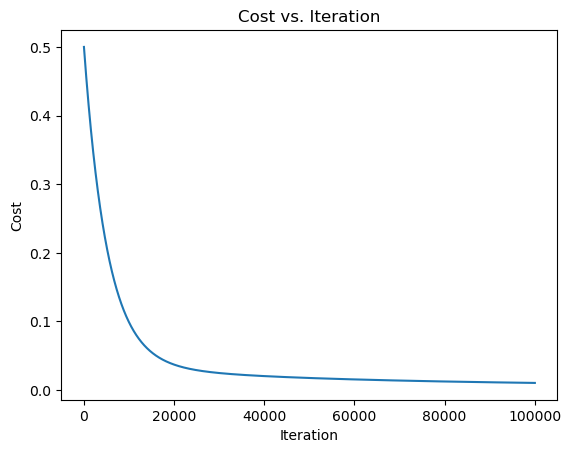

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(cost_cache)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

new_data = pd.DataFrame({'area': [3000, 2000], 'bedrooms': [3, 2], 'bathrooms': [2, 1], 'age': [1, 2]})
new_data_values = new_data.values
predictions = model.predict(new_data_values)

predictions


array([438515.69643401, 237921.36543737])

In [20]:
#let us compare with our custom model 

x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
y_mean = np.mean(y)
y_std = np.std(y)

new_data_normalized = (new_data_values - x_mean) / x_std

prediction_normalized = np.dot(new_data_normalized, w_final_values) + b_final

predictions_custom = prediction_normalized * y_std + y_mean

predictions_custom


array([433937.14711791, 237831.75441513])

In [25]:
# Assuming that x_train, y_train and z_train are your data
#2 features; 1 target 

x_train = np.array(df["area"])
y_train = np.array(df["age"])
z_train = np.array(df["price"])
x = x_train.reshape(-1, 1)
y = y_train.reshape(-1, 1)
z = z_train.reshape(-1, 1)

# For multiple variables, we need to concatenate them first
xy = np.concatenate((x, y), axis=1)
# Fit the Linear Regression
regressor = LinearRegression()
regressor.fit(xy, z)

# Generate the prediction
z_pred = regressor.predict(xy)

[2100 1800 2400 1900 3000 2200]


In [26]:
z_pred

array([[324504.35365037],
       [284773.10783657],
       [415300.56932351],
       [283122.90689886],
       [520295.54588078],
       [342003.51640991]])